## Goals of the Case Study


#### There are quite a few goals for this case study.

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

### Steps to Proceed with:

1. Data Cleaning/Data Preprocessing
2. Data Preparation
3. Model Building & Evaluation


In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action="ignore")

In [2]:
df = pd.read_csv('Leads.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
df.shape

(9240, 37)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
#Drop Prodpect ID, Lead Number as they are unique for each customer.
df = df.drop(['Prospect ID'],axis =1)
df = df.drop(['Lead Number'], axis =1)

## Missing Value check

In [6]:
100*df.isnull().mean()

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.0000

In [7]:
# Dropping the columns that have missing values more than 30 percent

df = df.drop(['Lead Quality'],axis=1)
df = df.drop(['Tags'],axis=1)
df = df.drop(['Asymmetrique Activity Index'],axis=1)
df = df.drop(['Asymmetrique Profile Index'],axis=1)
df = df.drop(['Asymmetrique Activity Score'],axis=1)
df = df.drop(['Asymmetrique Profile Score'],axis=1)


### Checking Data Imbalance

In [8]:
df['Search'].value_counts(normalize =True)

No     0.998485
Yes    0.001515
Name: Search, dtype: float64

In [9]:
df['Magazine'].value_counts(normalize =True)

No    1.0
Name: Magazine, dtype: float64

In [10]:
df['Newspaper Article'].value_counts(normalize =True)

No     0.999784
Yes    0.000216
Name: Newspaper Article, dtype: float64

In [11]:
df['X Education Forums'].value_counts(normalize =True)

No     0.999892
Yes    0.000108
Name: X Education Forums, dtype: float64

In [12]:
df['Newspaper'].value_counts(normalize =True)

No     0.999892
Yes    0.000108
Name: Newspaper, dtype: float64

In [13]:
df['Digital Advertisement'].value_counts(normalize =True)

No     0.999567
Yes    0.000433
Name: Digital Advertisement, dtype: float64

In [14]:
df['Through Recommendations'].value_counts(normalize =True)

No     0.999242
Yes    0.000758
Name: Through Recommendations, dtype: float64

In [15]:
df['Receive More Updates About Our Courses'].value_counts(normalize =True)

No    1.0
Name: Receive More Updates About Our Courses, dtype: float64

In [16]:
df['Update me on Supply Chain Content'].value_counts(normalize =True)

No    1.0
Name: Update me on Supply Chain Content, dtype: float64

In [17]:
df['Get updates on DM Content'].value_counts(normalize =True)

No    1.0
Name: Get updates on DM Content, dtype: float64

In [18]:
df['Country'].value_counts(normalize =True)

India                   0.957663
United States           0.010178
United Arab Emirates    0.007818
Singapore               0.003540
Saudi Arabia            0.003098
United Kingdom          0.002213
Australia               0.001918
Qatar                   0.001475
Hong Kong               0.001033
Bahrain                 0.001033
Oman                    0.000885
France                  0.000885
unknown                 0.000738
South Africa            0.000590
Nigeria                 0.000590
Germany                 0.000590
Kuwait                  0.000590
Canada                  0.000590
Sweden                  0.000443
China                   0.000295
Asia/Pacific Region     0.000295
Uganda                  0.000295
Bangladesh              0.000295
Italy                   0.000295
Belgium                 0.000295
Netherlands             0.000295
Ghana                   0.000295
Philippines             0.000295
Russia                  0.000148
Switzerland             0.000148
Vietnam   

In [19]:
df['Lead Profile'].value_counts(normalize =True)

Select                         0.634819
Potential Lead                 0.246976
Other Leads                    0.074567
Student of SomeSchool          0.036901
Lateral Student                0.003675
Dual Specialization Student    0.003062
Name: Lead Profile, dtype: float64

In [20]:
df['What matters most to you in choosing a course'].value_counts(normalize =True)

Better Career Prospects      0.999541
Flexibility & Convenience    0.000306
Other                        0.000153
Name: What matters most to you in choosing a course, dtype: float64

In [21]:
df['What is your current occupation'].value_counts(normalize =True)

Unemployed              0.854962
Working Professional    0.107786
Student                 0.032061
Other                   0.002443
Housewife               0.001527
Businessman             0.001221
Name: What is your current occupation, dtype: float64

In [22]:
df['How did you hear about X Education'].value_counts(normalize =True)

Select                   0.717048
Online Search            0.114887
Word Of Mouth            0.049481
Student of SomeSchool    0.044078
Other                    0.026447
Multiple Sources         0.021612
Advertisements           0.009953
Social Media             0.009527
Email                    0.003697
SMS                      0.003270
Name: How did you hear about X Education, dtype: float64

In [23]:
df['Lead Origin'].value_counts(normalize =True)

Landing Page Submission    0.528788
API                        0.387446
Lead Add Form              0.077706
Lead Import                0.005952
Quick Add Form             0.000108
Name: Lead Origin, dtype: float64

In [24]:
df['City'].value_counts(normalize =True)

Mumbai                         0.412020
Select                         0.287596
Thane & Outskirts              0.096164
Other Cities                   0.087724
Other Cities of Maharashtra    0.058440
Other Metro Cities             0.048593
Tier II Cities                 0.009463
Name: City, dtype: float64

In [25]:
df['Do Not Email'].value_counts(normalize =True)

No     0.920563
Yes    0.079437
Name: Do Not Email, dtype: float64

In [26]:
df['Do Not Call'].value_counts(normalize = True)

No     0.999784
Yes    0.000216
Name: Do Not Call, dtype: float64

#### Dropping Columns  because of data imbalance

In [27]:
df = df.drop(['Country'],axis=1)
df = df.drop(['What matters most to you in choosing a course'],axis=1)
df = df.drop(['What is your current occupation'],axis=1)
df = df.drop(['How did you hear about X Education'],axis=1)
#df = df.drop(['City'],axis=1)
df = df.drop(['Get updates on DM Content'],axis=1)
df = df.drop(['Update me on Supply Chain Content'],axis=1)
df = df.drop(['Receive More Updates About Our Courses'],axis=1)
df = df.drop(['Through Recommendations'],axis=1)
df = df.drop(['Digital Advertisement'],axis=1)
df = df.drop(['Newspaper'],axis=1)
df = df.drop(['X Education Forums'],axis=1)
df = df.drop(['Newspaper Article'],axis=1)
df = df.drop(['Magazine'],axis=1)
df = df.drop(['Search'],axis=1)
df = df.drop(['I agree to pay the amount through cheque'],axis = 1)
df = df.drop(['Do Not Email'],axis = 1)
df = df.drop(['Do Not Call'],axis = 1)


In [28]:
df.shape

(9240, 12)

In [29]:
df['Specialization'].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [30]:
df['Specialization']= df['Specialization'].replace({'Select':np.nan})

In [31]:
100*df['Specialization'].isnull().mean()

36.58008658008658

In [32]:
## Dropping Specilization column as it has more than 30 % missing values
df = df.drop(['Specialization'],axis=1)

In [33]:
df['Lead Profile'].value_counts(normalize=True)

Select                         0.634819
Potential Lead                 0.246976
Other Leads                    0.074567
Student of SomeSchool          0.036901
Lateral Student                0.003675
Dual Specialization Student    0.003062
Name: Lead Profile, dtype: float64

In [34]:
df['Lead Profile'] =df['Lead Profile'].replace({'Select':np.nan})

In [35]:
100*df['Lead Profile'].isnull().mean()

74.18831168831169

In [36]:
## Dropping Lead Profile column as it has more than 30 % missing values
df = df.drop(['Lead Profile'],axis=1)

In [37]:
df['City'] =df['City'].replace({'Select':np.nan})

In [38]:
100*df['City'].isnull().mean()

39.70779220779221

In [39]:
## Dropping Lead Profile column as it has more than 30 % missing values
df = df.drop(['City'],axis=1)

### More Data Cleaning steps

In [40]:
100*df['Lead Source'].value_counts(normalize=True)

Google               31.160365
Direct Traffic       27.629292
Olark Chat           19.067797
Organic Search       12.538027
Reference             5.801825
Welingak Website      1.542807
Referral Sites        1.358105
Facebook              0.597566
bing                  0.065189
google                0.054324
Click2call            0.043459
Press_Release         0.021730
Social Media          0.021730
Live Chat             0.021730
youtubechannel        0.010865
testone               0.010865
Pay per Click Ads     0.010865
welearnblog_Home      0.010865
WeLearn               0.010865
blog                  0.010865
NC_EDM                0.010865
Name: Lead Source, dtype: float64

In [41]:
df['Lead Source'] = df['Lead Source'].replace({'google':'Google'})

In [42]:
100*df['Lead Source'].value_counts(normalize=True)

Google               31.214689
Direct Traffic       27.629292
Olark Chat           19.067797
Organic Search       12.538027
Reference             5.801825
Welingak Website      1.542807
Referral Sites        1.358105
Facebook              0.597566
bing                  0.065189
Click2call            0.043459
Social Media          0.021730
Live Chat             0.021730
Press_Release         0.021730
Pay per Click Ads     0.010865
blog                  0.010865
WeLearn               0.010865
welearnblog_Home      0.010865
youtubechannel        0.010865
testone               0.010865
NC_EDM                0.010865
Name: Lead Source, dtype: float64

In [43]:
## Converting the value counts with less than 5% to Others for better dummy column creations
df['Lead Source'] = df['Lead Source'].replace(['Referral Sites','Welingak Website','Facebook','bing','Click2call','Press_Release','Live Chat','Social Media','welearnblog_Home','youtubechannel','WeLearn','Pay per Click Ads','NC_EDM','blog','testone'],'Others')

In [44]:
100*df['Lead Source'].value_counts(normalize=True)

Google            31.214689
Direct Traffic    27.629292
Olark Chat        19.067797
Organic Search    12.538027
Reference          5.801825
Others             3.748370
Name: Lead Source, dtype: float64

In [45]:
100*df['Last Activity'].value_counts(normalize = True)

Email Opened                    37.616285
SMS Sent                        30.042684
Olark Chat Conversation         10.649010
Page Visited on Website          7.004487
Converted to Lead                4.684251
Email Bounced                    3.567911
Email Link Clicked               2.922185
Form Submitted on Website        1.269563
Unreachable                      1.017840
Unsubscribed                     0.667615
Had a Phone Conversation         0.328335
Approached upfront               0.098501
View in browser link Clicked     0.065667
Email Received                   0.021889
Email Marked Spam                0.021889
Visited Booth in Tradeshow       0.010945
Resubscribed to emails           0.010945
Name: Last Activity, dtype: float64

In [46]:
## Converting the value counts with less than 5% to Others for better dummy column creations
df['Last Activity'] = df['Last Activity'].replace(['Form Submitted on Website','Email Bounced','Email Link Clicked','Unreachable','Unsubscribed','Had a Phone Conversation','Approached upfront','View in browser link Clicked','Email Received','Email Marked Spam','Visited Booth in Tradeshow','Resubscribed to emails'],'Others')

In [47]:
100*df['Last Activity'].value_counts(normalize = True)

Email Opened               37.616285
SMS Sent                   30.042684
Olark Chat Conversation    10.649010
Others                     10.003283
Page Visited on Website     7.004487
Converted to Lead           4.684251
Name: Last Activity, dtype: float64

In [48]:
100*df['Last Notable Activity'].value_counts(normalize=True)

Modified                        36.872294
Email Opened                    30.595238
SMS Sent                        23.506494
Page Visited on Website          3.441558
Olark Chat Conversation          1.980519
Email Link Clicked               1.872294
Email Bounced                    0.649351
Unsubscribed                     0.508658
Unreachable                      0.346320
Had a Phone Conversation         0.151515
Email Marked Spam                0.021645
Approached upfront               0.010823
Resubscribed to emails           0.010823
View in browser link Clicked     0.010823
Form Submitted on Website        0.010823
Email Received                   0.010823
Name: Last Notable Activity, dtype: float64

In [49]:
## Converting the value counts with less than 5% to Others for better dummy column creations
df['Last Notable Activity'] = df['Last Notable Activity'].replace(['Page Visited on Website','Olark Chat Conversation','Email Link Clicked','Email Bounced','Unsubscribed','Unreachable','Had a Phone Conversation','Email Marked Spam','Approached upfront','Resubscribed to emails','View in browser link Clicked','Form Submitted on Website','Email Received'],'Others')

In [50]:
100*df['Last Notable Activity'].value_counts(normalize=True)

Modified        36.872294
Email Opened    30.595238
SMS Sent        23.506494
Others           9.025974
Name: Last Notable Activity, dtype: float64

In [51]:
df['Last Activity'].value_counts(normalize=True)

Email Opened               0.376163
SMS Sent                   0.300427
Olark Chat Conversation    0.106490
Others                     0.100033
Page Visited on Website    0.070045
Converted to Lead          0.046843
Name: Last Activity, dtype: float64

In [52]:
## Converting the value counts with less than 5% to Others for better dummy column creations
df['Lead Origin'] = df['Lead Origin'].replace(['Lead Import','Quick Add Form'],'Others')

In [53]:
100*df['Lead Origin'].value_counts(normalize=True)

Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Others                      0.606061
Name: Lead Origin, dtype: float64

In [54]:
df.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,No,Modified
1,API,Organic Search,0,5.0,674,2.5,Email Opened,No,Email Opened
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Others,No,Modified
4,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,No,Modified


In [55]:
df.shape

(9240, 9)

## EDA

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 9 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9204 non-null   object 
 2   Converted                               9240 non-null   int64  
 3   TotalVisits                             9103 non-null   float64
 4   Total Time Spent on Website             9240 non-null   int64  
 5   Page Views Per Visit                    9103 non-null   float64
 6   Last Activity                           9137 non-null   object 
 7   A free copy of Mastering The Interview  9240 non-null   object 
 8   Last Notable Activity                   9240 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 649.8+ KB


In [57]:
cat_cols = ['Lead Origin','Lead Source','Last Activity','A free copy of Mastering The Interview','Last Notable Activity']
cont_cols = ['Converted','TotalVisits','Total Time Spent on Website','Page Views Per Visit']
target = ['Converted']

In [58]:
df.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9103.000000,9240.000000,9103.000000
mean,0.385390,3.445238,487.698268,2.362820
std,0.486714,4.854853,548.021466,2.161418
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
max,1.000000,251.000000,2272.000000,55.000000


In [59]:
cont_cols = ['Converted','TotalVisits','Total Time Spent on Website','Page Views Per Visit']

In [60]:
len(cat_cols)+len(cont_cols)

9

## Univariate Analysis

Converted


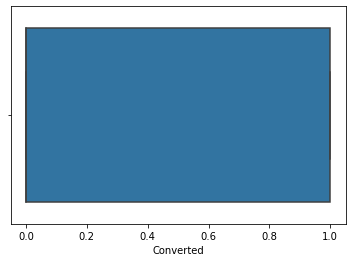

TotalVisits


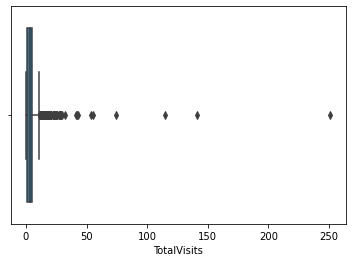

Total Time Spent on Website


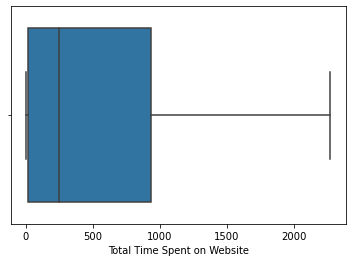

Page Views Per Visit


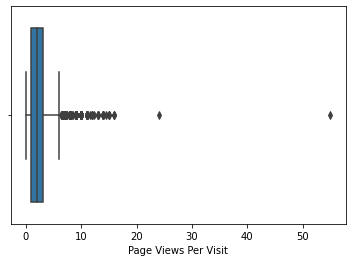

In [61]:
for i in cont_cols:
    print(i)
    sns.boxplot(df[i])
    plt.show()

Converted


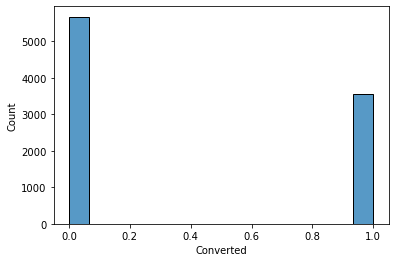

TotalVisits


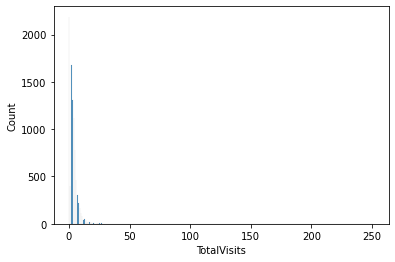

Total Time Spent on Website


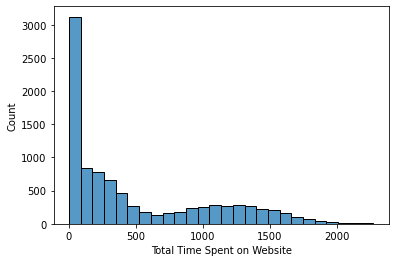

Page Views Per Visit


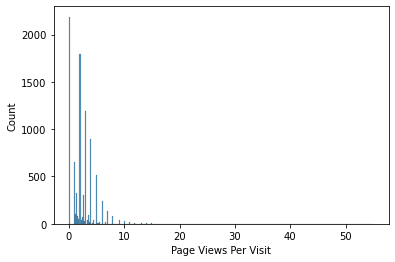

In [62]:
for i in cont_cols:
    print(i)
    sns.histplot(df[i])
    plt.show()

Lead Origin


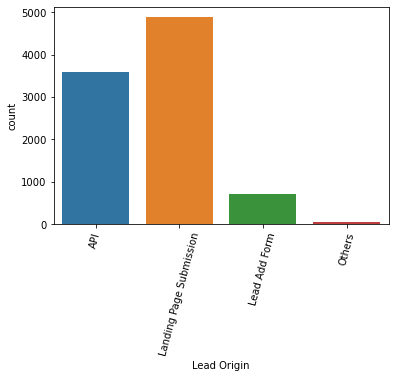

Lead Source


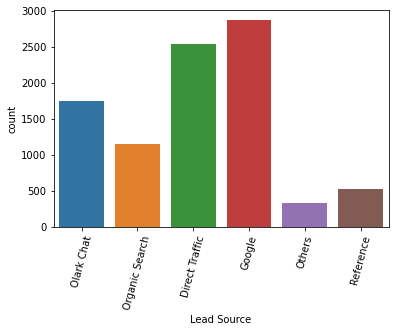

Last Activity


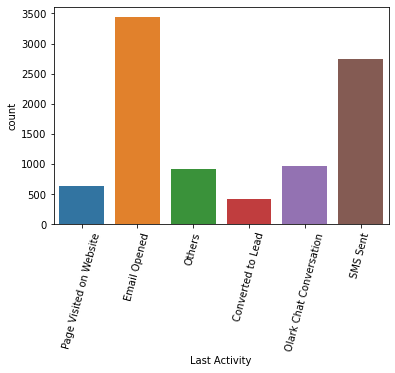

A free copy of Mastering The Interview


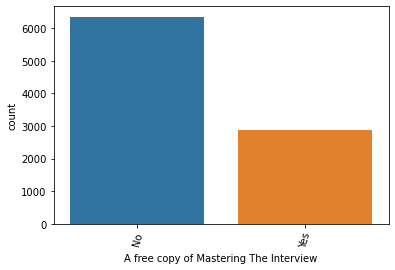

Last Notable Activity


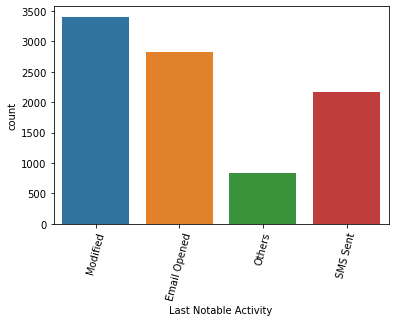

In [63]:
for i in cat_cols:
    print(i)
    plt.xticks(rotation = 75)
    sns.countplot(df[i],orient="h")
    plt.show()

## Bivariate Analysis

Boxplot Converted Vs Lead Origin


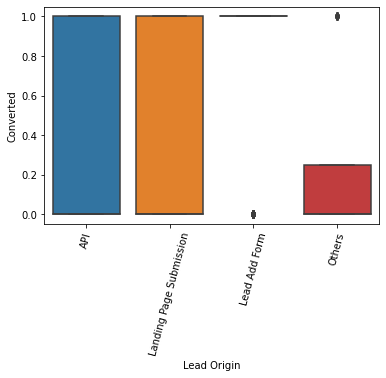

Boxplot Converted Vs Lead Source


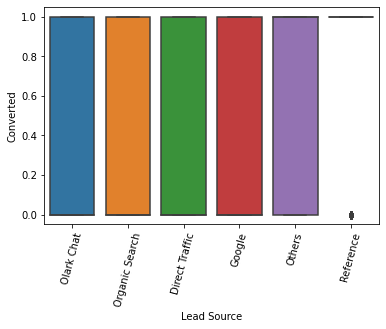

Boxplot Converted Vs Last Activity


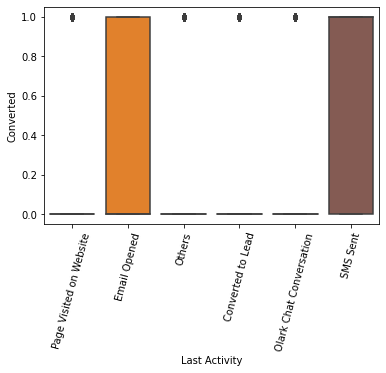

Boxplot Converted Vs A free copy of Mastering The Interview


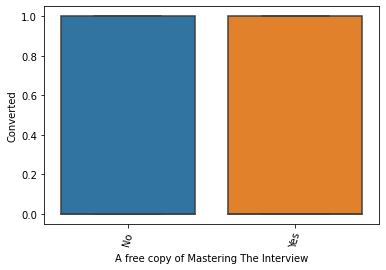

Boxplot Converted Vs Last Notable Activity


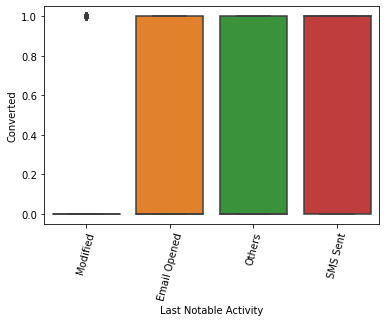

Boxplot TotalVisits Vs Lead Origin


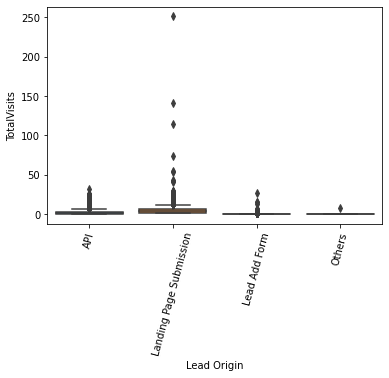

Boxplot TotalVisits Vs Lead Source


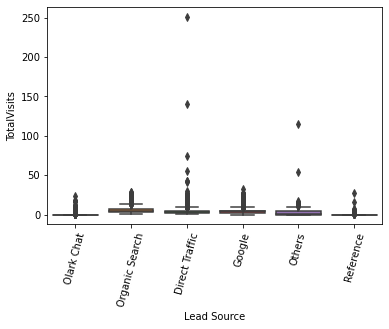

Boxplot TotalVisits Vs Last Activity


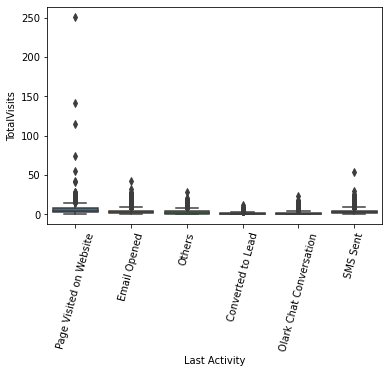

Boxplot TotalVisits Vs A free copy of Mastering The Interview


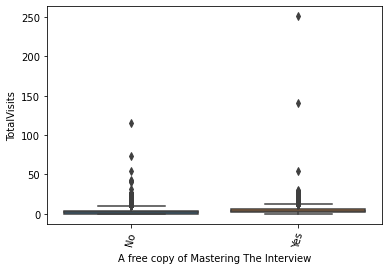

Boxplot TotalVisits Vs Last Notable Activity


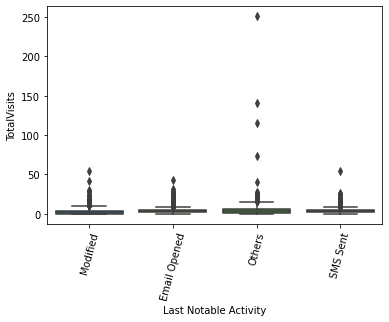

Boxplot Total Time Spent on Website Vs Lead Origin


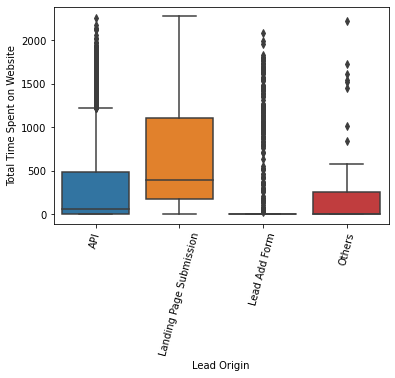

Boxplot Total Time Spent on Website Vs Lead Source


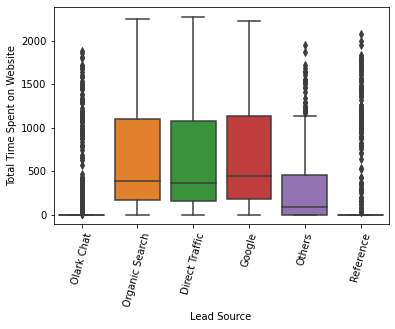

Boxplot Total Time Spent on Website Vs Last Activity


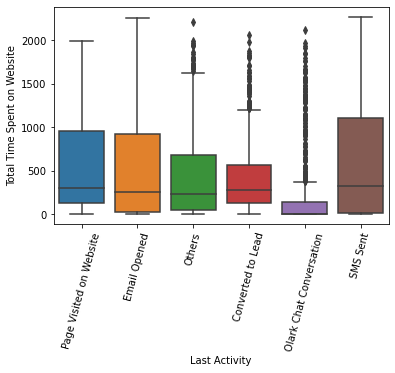

Boxplot Total Time Spent on Website Vs A free copy of Mastering The Interview


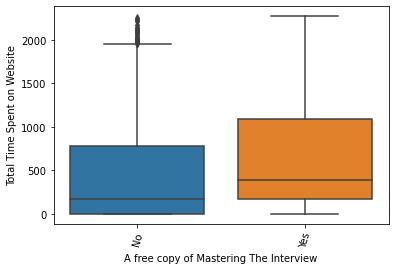

Boxplot Total Time Spent on Website Vs Last Notable Activity


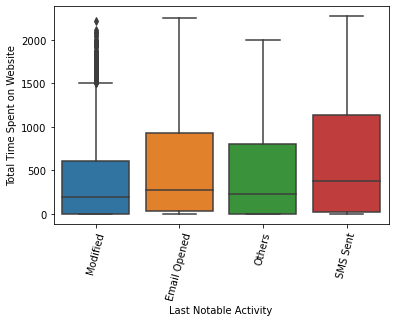

Boxplot Page Views Per Visit Vs Lead Origin


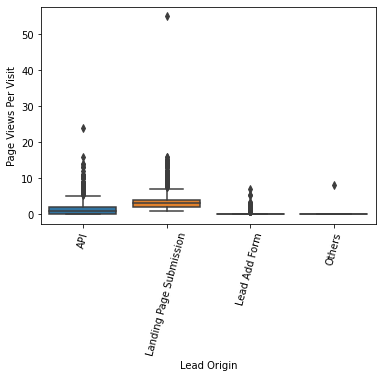

Boxplot Page Views Per Visit Vs Lead Source


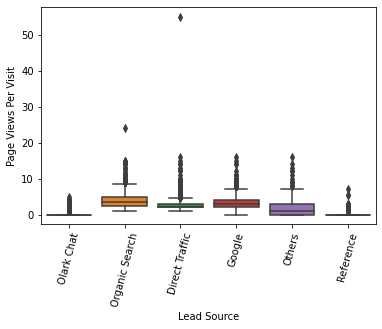

Boxplot Page Views Per Visit Vs Last Activity


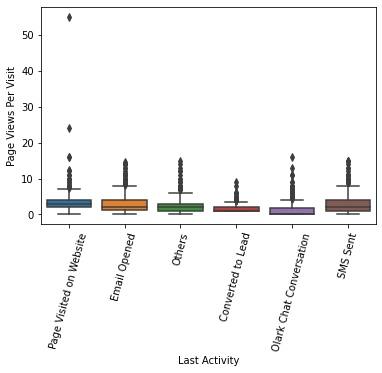

Boxplot Page Views Per Visit Vs A free copy of Mastering The Interview


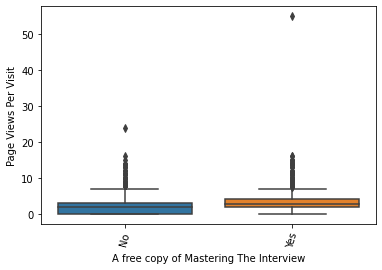

Boxplot Page Views Per Visit Vs Last Notable Activity


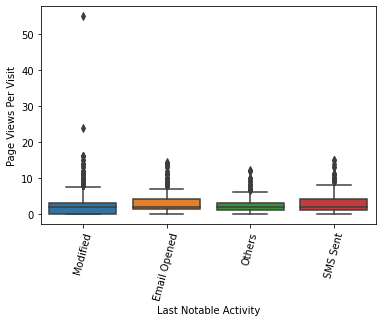

In [64]:
for i in cont_cols:
    for j in cat_cols:
        print("Boxplot",i,"Vs",j)
        plt.xticks(rotation = 75)
        sns.boxplot(df[j],df[i])
        plt.show()

ScatterPlot Converted Vs TotalVisits


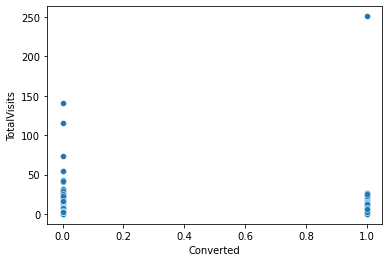

ScatterPlot Converted Vs Total Time Spent on Website


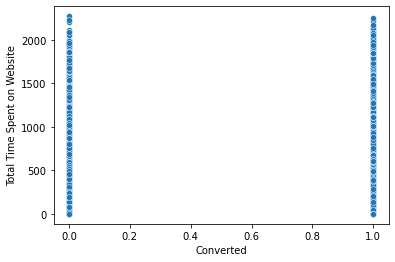

ScatterPlot Converted Vs Page Views Per Visit


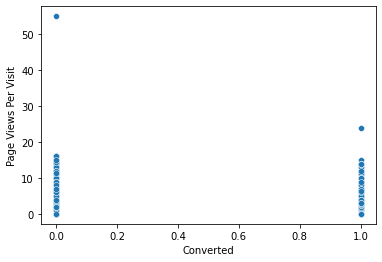

ScatterPlot TotalVisits Vs Converted


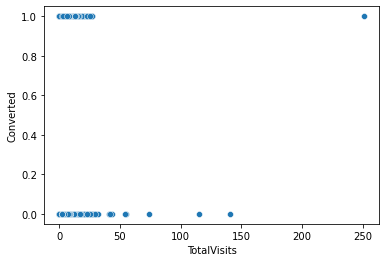

ScatterPlot TotalVisits Vs Total Time Spent on Website


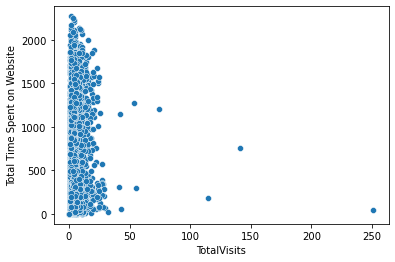

ScatterPlot TotalVisits Vs Page Views Per Visit


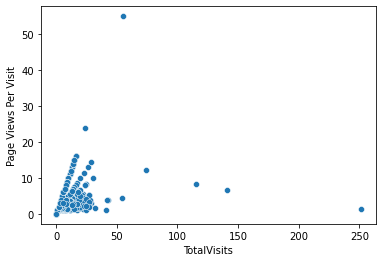

ScatterPlot Total Time Spent on Website Vs Converted


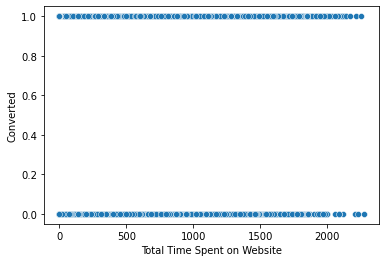

ScatterPlot Total Time Spent on Website Vs TotalVisits


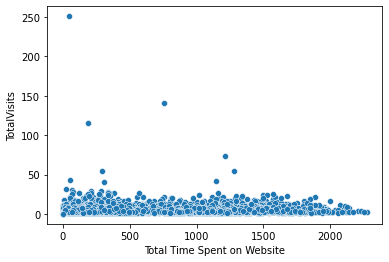

ScatterPlot Total Time Spent on Website Vs Page Views Per Visit


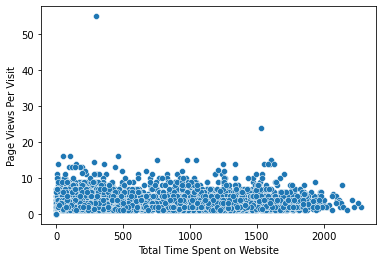

ScatterPlot Page Views Per Visit Vs Converted


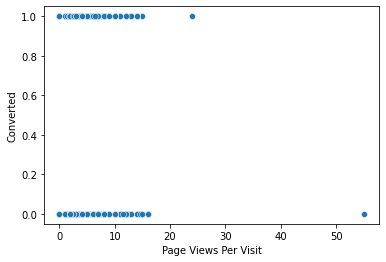

ScatterPlot Page Views Per Visit Vs TotalVisits


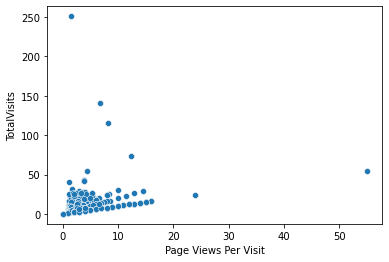

ScatterPlot Page Views Per Visit Vs Total Time Spent on Website


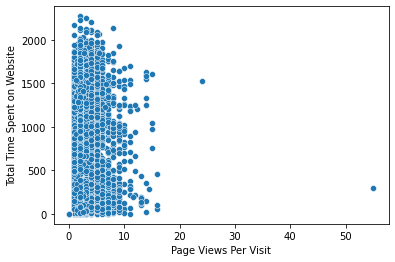

In [65]:
for i in cont_cols:
    for j in cont_cols:
        if i!=j:
            print("ScatterPlot",i,"Vs",j)
            sns.scatterplot(df[i],df[j])
            plt.show()

## Multivariat Analysis

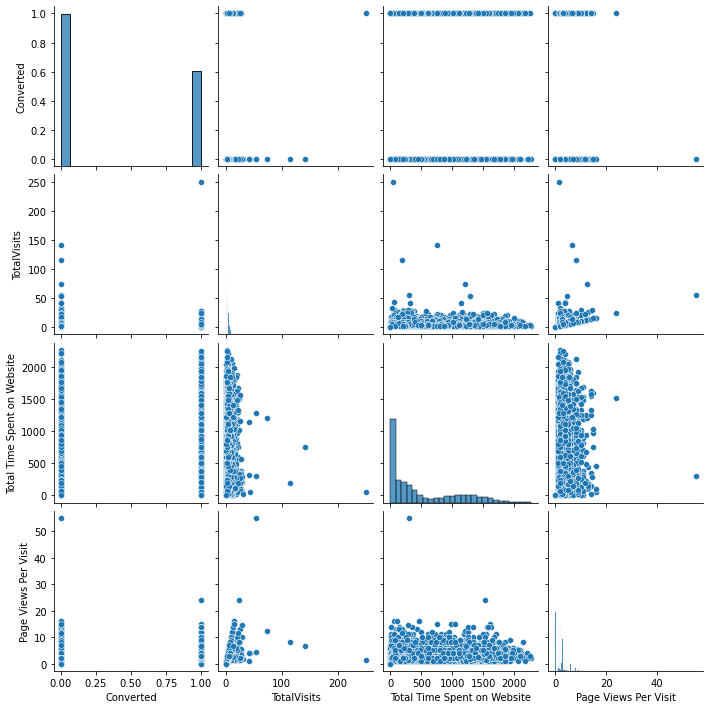

In [66]:
sns.pairplot(df[cont_cols])

<AxesSubplot:>

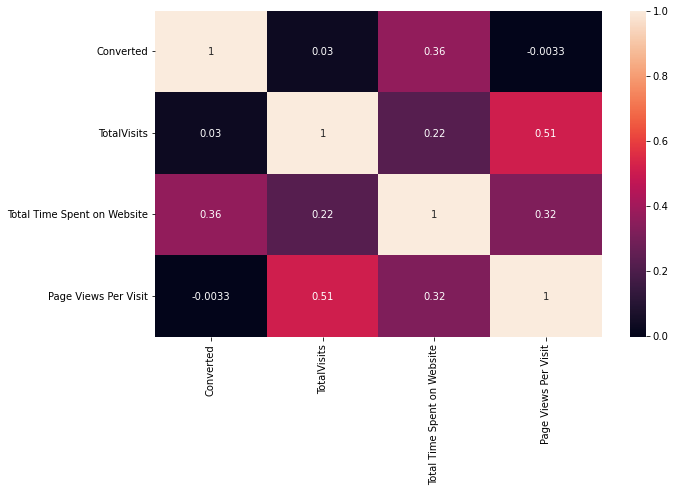

In [67]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

In [68]:
df.columns

Index(['Lead Origin', 'Lead Source', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 9 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9204 non-null   object 
 2   Converted                               9240 non-null   int64  
 3   TotalVisits                             9103 non-null   float64
 4   Total Time Spent on Website             9240 non-null   int64  
 5   Page Views Per Visit                    9103 non-null   float64
 6   Last Activity                           9137 non-null   object 
 7   A free copy of Mastering The Interview  9240 non-null   object 
 8   Last Notable Activity                   9240 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 649.8+ KB


In [70]:
100*df['Lead Origin'].value_counts(normalize=True)

Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Others                      0.606061
Name: Lead Origin, dtype: float64

In [71]:
X=df.drop("Converted",axis=1)
y=df[target]

In [72]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

In [73]:
print("Train X shape:",X_train.shape)
print("Test X shape:",X_test.shape)
print("Train y shape:",y_train.shape)
print("Test y shape:",y_test.shape)

Train X shape: (7392, 8)
Test X shape: (1848, 8)
Train y shape: (7392, 1)
Test y shape: (1848, 1)


## Additional Preprocessing

In [74]:
X_train.head()

,Lead Origin,Lead Source,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,A free copy of Mastering The Interview,Last Notable Activity
7263,API,Olark Chat,0.0,0,0.0,Email Opened,No,Modified
6468,Landing Page Submission,Direct Traffic,2.0,138,2.0,SMS Sent,Yes,SMS Sent
7833,Landing Page Submission,Direct Traffic,2.0,79,2.0,SMS Sent,Yes,SMS Sent
4461,Landing Page Submission,Google,4.0,1579,4.0,SMS Sent,No,SMS Sent
8453,API,Olark Chat,0.0,0,0.0,Olark Chat Conversation,No,Modified


In [75]:
X_test.head()

,Lead Origin,Lead Source,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,A free copy of Mastering The Interview,Last Notable Activity
4269,API,Direct Traffic,8.0,1011,8.0,SMS Sent,No,SMS Sent
2376,Lead Add Form,Reference,0.0,0,0.0,SMS Sent,No,SMS Sent
7766,API,Google,5.0,59,5.0,Others,No,Others
9199,API,Olark Chat,0.0,0,0.0,Olark Chat Conversation,No,Modified
4359,Lead Add Form,Reference,0.0,0,0.0,Email Opened,No,Email Opened


## Missing Value Imputation

In [76]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7392 entries, 7263 to 5640
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             7392 non-null   object 
 1   Lead Source                             7361 non-null   object 
 2   TotalVisits                             7280 non-null   float64
 3   Total Time Spent on Website             7392 non-null   int64  
 4   Page Views Per Visit                    7280 non-null   float64
 5   Last Activity                           7309 non-null   object 
 6   A free copy of Mastering The Interview  7392 non-null   object 
 7   Last Notable Activity                   7392 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 519.8+ KB


In [77]:
100*X_train.isnull().mean()

Lead Origin                               0.000000
Lead Source                               0.419372
TotalVisits                               1.515152
Total Time Spent on Website               0.000000
Page Views Per Visit                      1.515152
Last Activity                             1.122835
A free copy of Mastering The Interview    0.000000
Last Notable Activity                     0.000000
dtype: float64

In [78]:
100*X_test.isnull().mean()

Lead Origin                               0.000000
Lead Source                               0.270563
TotalVisits                               1.352814
Total Time Spent on Website               0.000000
Page Views Per Visit                      1.352814
Last Activity                             1.082251
A free copy of Mastering The Interview    0.000000
Last Notable Activity                     0.000000
dtype: float64

In [79]:
Lead_Source_Imput_Value = X_train['Lead Source'].mode()[0]

In [80]:
X_train['Lead Source'] = X_train['Lead Source'].fillna(Lead_Source_Imput_Value)
X_test['Lead Source'] = X_test['Lead Source'].fillna(Lead_Source_Imput_Value)

In [81]:
TotalVisits_impute_Value = X_train['TotalVisits'].median()
X_train['TotalVisits'] = X_train['TotalVisits'].fillna(TotalVisits_impute_Value)
X_test['TotalVisits'] = X_test['TotalVisits'].fillna(TotalVisits_impute_Value)

In [82]:
TotalVisits_impute_Value

3.0

In [83]:
PageVisit_Impute_Value = X_train['Page Views Per Visit'].median()

In [84]:
X_train['Page Views Per Visit'] = X_train['Page Views Per Visit'].fillna(PageVisit_Impute_Value)
X_test['Page Views Per Visit'] = X_test['Page Views Per Visit'].fillna(PageVisit_Impute_Value)

In [85]:
LastActivity_impute_values = X_train['Last Activity'].mode()[0]
X_train['Last Activity'] = X_train['Last Activity'].fillna(LastActivity_impute_values)
X_test['Last Activity'] = X_test['Last Activity'].fillna(LastActivity_impute_values)

In [86]:
X_test.isnull().mean()

Lead Origin                               0.0
Lead Source                               0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

In [87]:
X_train.isnull().mean()

Lead Origin                               0.0
Lead Source                               0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

## Outlier Treatment

In [88]:
Cont_cols_1 = ['TotalVisits','Total Time Spent on Website','Total Time Spent on Website']

In [89]:
for var in Cont_cols_1:
    q1=X_train[var].describe()["25%"]
    q3=X_train[var].describe()["75%"]
    iqr=q3-q1
    lower_bound=q1-1.5*iqr
    upper_bound=q3+1.5*iqr
    X_train[var]=np.where(X_train[var]>upper_bound,upper_bound,X_train[var])
    X_train[var]=np.where(X_train[var]<lower_bound,lower_bound,X_train[var])
    X_test[var]=np.where(X_test[var]>upper_bound,upper_bound,X_test[var])
    X_test[var]=np.where(X_test[var]<lower_bound,lower_bound,X_test[var])
    print (lower_bound)
    print (upper_bound)
    

-5.0
11.0
-1356.0
2292.0
-1356.0
2292.0


In [90]:
100*X_train.isnull().mean()

Lead Origin                               0.0
Lead Source                               0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

In [91]:
100*X_test.isnull().mean()

Lead Origin                               0.0
Lead Source                               0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

In [92]:
X_train['TotalVisits'].value_counts(normalize = True)

0.0     0.234984
2.0     0.182359
3.0     0.157197
4.0     0.122294
5.0     0.083063
6.0     0.052083
1.0     0.042614
11.0    0.039367
7.0     0.033144
8.0     0.023539
9.0     0.017316
10.0    0.012040
Name: TotalVisits, dtype: float64

In [93]:
## Dummy Column Creation
dum_cols = ['Lead Origin','Lead Source','Last Activity','A free copy of Mastering The Interview','Last Notable Activity']
dum = pd.get_dummies(X_train[dum_cols],drop_first =True)
X_train =X_train.drop(dum_cols,axis=1)
X_train = pd.concat([X_train,dum],axis=1)

In [94]:
dum_cols = ['Lead Origin','Lead Source','Last Activity','A free copy of Mastering The Interview','Last Notable Activity']
dum = pd.get_dummies(X_test[dum_cols],drop_first =True)
X_test =X_test.drop(dum_cols,axis=1)
X_test = pd.concat([X_test,dum],axis=1)

In [95]:
X_train.columns

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Others', 'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Reference', 'Last Activity_Email Opened',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'A free copy of Mastering The Interview_Yes',
       'Last Notable Activity_Modified', 'Last Notable Activity_Others',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [96]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Others,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,A free copy of Mastering The Interview_Yes,Last Notable Activity_Modified,Last Notable Activity_Others,Last Notable Activity_SMS Sent
7263,0.0,0.0,0.0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
6468,2.0,138.0,2.0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1
7833,2.0,79.0,2.0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1
4461,4.0,1579.0,4.0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
8453,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0


In [97]:
X_test.columns

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Others', 'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Reference', 'Last Activity_Email Opened',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'A free copy of Mastering The Interview_Yes',
       'Last Notable Activity_Modified', 'Last Notable Activity_Others',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

## Scaling

In [98]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics

In [99]:
import sklearn
import statsmodels.api as sm

In [100]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

In [101]:
# Scaling the 3 variables to same scale for better model.

scaler = StandardScaler()

X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Others,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,A free copy of Mastering The Interview_Yes,Last Notable Activity_Modified,Last Notable Activity_Others,Last Notable Activity_SMS Sent
7263,-1.126969,-0.884942,-1.086491,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
6468,-0.428185,-0.632201,-0.166646,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1
7833,-0.428185,-0.740257,-0.166646,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1
4461,0.270599,2.006923,0.753199,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
8453,-1.126969,-0.884942,-1.086491,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0


In [102]:
X_train.shape

(7392, 20)

# Model Building

In [103]:
logreg = LogisticRegression()

In [104]:
rfe = RFE(logreg, n_features_to_select = 15)
rfe = rfe.fit(X_train, y_train)

In [105]:
# List of columns which are selected by RFE
col = X_train.columns[rfe.support_]

In [106]:
col

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Lead Add Form', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Others', 'Lead Source_Reference',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Notable Activity_Modified', 'Last Notable Activity_Others',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [107]:
col.size

15

In [108]:
X_train_sm = sm.add_constant(X_train[col])

log_m1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())

res = log_m1.fit()

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7376
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3290.2
Date:                Tue, 15 Nov 2022   Deviance:                       6580.3
Time:                        21:47:40   Pearson chi2:                 7.69e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3563
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -2.0188      0.165    -12.253      0.000      -2.342      -1.696
TotalVisits                               0.3449      0.048      7.182      0.000       0.251       0.439
Total Time Spent on Website               1.1082      0.036     30.831      0.000       1.038       1.179
Page Views Per Visit                     -0.2551      0.050     -5.083      0.000      -0.353      -0.157
Lead Origin_Lead Add Form                 4.1235      0.390     10.564      0.000       3.358       4.888
Lead Source_Google                        0.3206      0.072      4.480      0.000       0.180       0.461
Lead Source_Olark Chat                    1.3560      0.117     11.582      0.000       1.127       1.585
Lead Source_Others                        0.4400      0.206      2.131      0.033       0.035       0.845
Lead Source_Reference                     0.1492      0.427      0.350      0.727      -0.687       0.986
Last Activity_Email Opened                0.7707      0.154      5.007      0.000       0.469       1.072
Last Activity_Olark Chat Conversation    -0.7615      0.173     -4.398      0.000      -1.101      -0.422
Last Activity_Page Visited on Website    -0.2867      0.165     -1.742      0.082      -0.609       0.036
Last Activity_SMS Sent                    1.0094      0.158      6.400      0.000       0.700       1.319
Last Notable Activity_Modified           -0.2933      0.124     -2.369      0.018      -0.536      -0.051
Last Notable Activity_Others              0.3666      0.186      1.967      0.049       0.001       0.732
Last Notable Activity_SMS Sent            1.0774      0.180      5.975      0.000       0.724       1.431
=========================================================================================================
"""

In [109]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

7263    0.217966
6468    0.323487
7833    0.297853
4461    0.925112
8453    0.056798
7094    0.937544
7932    0.056798
449     0.742236
5382    0.710477
3768    0.056798
dtype: float64

In [110]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.21796649, 0.32348727, 0.2978532 , 0.92511154, 0.0567981 ,
       0.93754432, 0.0567981 , 0.74223554, 0.71047665, 0.0567981 ])

In [111]:
y_train = y_train.values.reshape(-1)

In [112]:
y_train = pd.Series(y_train)

In [113]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,ID
0,1,0.217966,0
1,0,0.323487,1
2,1,0.297853,2
3,0,0.925112,3
4,0,0.056798,4


In [114]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head(10)

,Converted,Converted_Prob,ID,Predicted
0,1,0.217966,0,0
1,0,0.323487,1,0
2,1,0.297853,2,0
3,0,0.925112,3,1
4,0,0.056798,4,0
5,1,0.937544,5,1
6,0,0.056798,6,0
7,1,0.742236,7,1
8,1,0.710477,8,1
9,0,0.056798,9,0


In [115]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[4011  552]
 [ 921 1908]]


In [116]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8007305194805194


In [117]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [118]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Last Activity_SMS Sent,6.59
3,Lead Origin_Lead Add Form,6.34
14,Last Notable Activity_SMS Sent,6.29
7,Lead Source_Reference,5.70
5,Lead Source_Olark Chat,2.66
0,TotalVisits,2.54
2,Page Views Per Visit,2.36
12,Last Notable Activity_Modified,2.22
9,Last Activity_Olark Chat Conversation,1.85
4,Lead Source_Google,1.77


In [119]:
col = col.drop('Lead Source_Reference', 1)
col

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Lead Add Form', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Others',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Notable Activity_Modified', 'Last Notable Activity_Others',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [120]:
X_train_sm.shape

(7392, 16)

In [121]:
y_train.shape

(7392,)

In [122]:
y_train = y_train.values.reshape(-1,1)

In [123]:
X_train_sm = sm.add_constant(X_train[col])

log_m2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())

res = log_m2.fit()

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7377
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3290.2
Date:                Tue, 15 Nov 2022   Deviance:                       6580.5
Time:                        21:47:41   Pearson chi2:                 7.69e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3563
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -2.0175      0.165    -12.251      0.000      -2.340      -1.695
TotalVisits                               0.3448      0.048      7.182      0.000       0.251       0.439
Total Time Spent on Website               1.1079      0.036     30.836      0.000       1.038       1.178
Page Views Per Visit                     -0.2552      0.050     -5.085      0.000      -0.354      -0.157
Lead Origin_Lead Add Form                 4.2452      0.182     23.325      0.000       3.888       4.602
Lead Source_Google                        0.3181      0.071      4.468      0.000       0.179       0.458
Lead Source_Olark Chat                    1.3534      0.117     11.584      0.000       1.124       1.582
Lead Source_Others                        0.4129      0.193      2.145      0.032       0.036       0.790
Last Activity_Email Opened                0.7718      0.154      5.016      0.000       0.470       1.073
Last Activity_Olark Chat Conversation    -0.7611      0.173     -4.395      0.000      -1.100      -0.422
Last Activity_Page Visited on Website    -0.2862      0.165     -1.739      0.082      -0.609       0.036
Last Activity_SMS Sent                    1.0088      0.158      6.396      0.000       0.700       1.318
Last Notable Activity_Modified           -0.2921      0.124     -2.361      0.018      -0.535      -0.050
Last Notable Activity_Others              0.3669      0.186      1.968      0.049       0.001       0.732
Last Notable Activity_SMS Sent            1.0781      0.180      5.980      0.000       0.725       1.431
=========================================================================================================
"""

In [124]:
y_train_pred = res.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.21819685, 0.32383412, 0.29819126, 0.92498462, 0.05683751,
       0.93757684, 0.05683751, 0.7603553 , 0.71083853, 0.05683751])

In [125]:
y_train_pred_final['Converted_Prob'] = y_train_pred

In [126]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,ID,Predicted
0,1,0.218197,0,0
1,0,0.323834,1,0
2,1,0.298191,2,0
3,0,0.924985,3,1
4,0,0.056838,4,0


In [127]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8005952380952381


In [128]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Last Activity_SMS Sent,6.59
13,Last Notable Activity_SMS Sent,6.28
5,Lead Source_Olark Chat,2.64
0,TotalVisits,2.54
2,Page Views Per Visit,2.36
11,Last Notable Activity_Modified,2.20
8,Last Activity_Olark Chat Conversation,1.84
4,Lead Source_Google,1.73
7,Last Activity_Email Opened,1.68
3,Lead Origin_Lead Add Form,1.55


In [129]:
col = col.drop('Last Activity_Page Visited on Website')
col

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Lead Add Form', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Others',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_SMS Sent', 'Last Notable Activity_Modified',
       'Last Notable Activity_Others', 'Last Notable Activity_SMS Sent'],
      dtype='object')

In [130]:
X_train_sm = sm.add_constant(X_train[col])

log_m3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())

res = log_m3.fit()

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7378
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3291.8
Date:                Tue, 15 Nov 2022   Deviance:                       6583.5
Time:                        21:47:41   Pearson chi2:                 7.67e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3560
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -2.0927      0.160    -13.112      0.000      -2.406      -1.780
TotalVisits                               0.3259      0.047      6.988      0.000       0.234       0.417
Total Time Spent on Website               1.1072      0.036     30.850      0.000       1.037       1.178
Page Views Per Visit                     -0.2486      0.050     -4.983      0.000      -0.346      -0.151
Lead Origin_Lead Add Form                 4.2363      0.182     23.296      0.000       3.880       4.593
Lead Source_Google                        0.3161      0.071      4.442      0.000       0.177       0.456
Lead Source_Olark Chat                    1.3412      0.117     11.506      0.000       1.113       1.570
Lead Source_Others                        0.4120      0.192      2.140      0.032       0.035       0.789
Last Activity_Email Opened                0.8524      0.147      5.784      0.000       0.564       1.141
Last Activity_Olark Chat Conversation    -0.6678      0.165     -4.041      0.000      -0.992      -0.344
Last Activity_SMS Sent                    1.0897      0.151      7.200      0.000       0.793       1.386
Last Notable Activity_Modified           -0.2943      0.124     -2.380      0.017      -0.537      -0.052
Last Notable Activity_Others              0.3211      0.185      1.739      0.082      -0.041       0.683
Last Notable Activity_SMS Sent            1.0754      0.180      5.968      0.000       0.722       1.429
=========================================================================================================
"""

In [131]:
y_train_pred = res.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.21919407, 0.32615522, 0.30042764, 0.92494151, 0.05783817,
       0.93763968, 0.05783817, 0.75621389, 0.70934668, 0.05783817])

In [132]:
y_train_pred_final['Converted_Prob'] = y_train_pred

In [133]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,ID,Predicted
0,1,0.219194,0,0
1,0,0.326155,1,0
2,1,0.300428,2,0
3,0,0.924942,3,1
4,0,0.057838,4,0


In [134]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8003246753246753


In [135]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Last Activity_SMS Sent,6.30
12,Last Notable Activity_SMS Sent,6.10
5,Lead Source_Olark Chat,2.62
0,TotalVisits,2.44
2,Page Views Per Visit,2.36
10,Last Notable Activity_Modified,1.92
4,Lead Source_Google,1.72
8,Last Activity_Olark Chat Conversation,1.72
7,Last Activity_Email Opened,1.65
3,Lead Origin_Lead Add Form,1.54


In [136]:
col = col.drop('Last Activity_SMS Sent')
col

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Lead Add Form', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Others',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Notable Activity_Modified', 'Last Notable Activity_Others',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [137]:
X_train_sm = sm.add_constant(X_train[col])

log_m4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())

res = log_m4.fit()

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7379
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3317.4
Date:                Tue, 15 Nov 2022   Deviance:                       6634.8
Time:                        21:47:41   Pearson chi2:                 7.71e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3516
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.7174      0.148    -11.620      0.000      -2.007      -1.428
TotalVisits                               0.3281      0.046      7.091      0.000       0.237       0.419
Total Time Spent on Website               1.1052      0.036     30.990      0.000       1.035       1.175
Page Views Per Visit                     -0.2317      0.049     -4.696      0.000      -0.328      -0.135
Lead Origin_Lead Add Form                 4.3540      0.182     23.893      0.000       3.997       4.711
Lead Source_Google                        0.3286      0.071      4.641      0.000       0.190       0.467
Lead Source_Olark Chat                    1.3785      0.116     11.882      0.000       1.151       1.606
Lead Source_Others                        0.4146      0.191      2.173      0.030       0.041       0.789
Last Activity_Email Opened                0.4604      0.134      3.433      0.001       0.198       0.723
Last Activity_Olark Chat Conversation    -0.9623      0.158     -6.094      0.000      -1.272      -0.653
Last Notable Activity_Modified           -0.2989      0.124     -2.410      0.016      -0.542      -0.056
Last Notable Activity_Others             -0.0254      0.177     -0.144      0.886      -0.372       0.322
Last Notable Activity_SMS Sent            1.7732      0.155     11.424      0.000       1.469       2.077
=========================================================================================================
"""

In [138]:
y_train_pred = res.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred_final['Converted_Prob'] = y_train_pred
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,ID,Predicted
0,1,0.218665,0,0
1,0,0.321959,1,0
2,1,0.296462,2,0
3,0,0.925300,3,1
4,0,0.063204,4,0


In [139]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7991071428571429


In [140]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Lead Source_Olark Chat,2.60
0,TotalVisits,2.44
2,Page Views Per Visit,2.35
4,Lead Source_Google,1.71
8,Last Activity_Olark Chat Conversation,1.63
9,Last Notable Activity_Modified,1.62
7,Last Activity_Email Opened,1.60
3,Lead Origin_Lead Add Form,1.53
11,Last Notable Activity_SMS Sent,1.46
1,Total Time Spent on Website,1.26


In [141]:
col = col.drop('Last Notable Activity_Others')
col

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Lead Add Form', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Others',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Notable Activity_Modified', 'Last Notable Activity_SMS Sent'],
      dtype='object')

In [142]:
X_train_sm = sm.add_constant(X_train[col])

log_m5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())

res = log_m5.fit()

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7380
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3317.4
Date:                Tue, 15 Nov 2022   Deviance:                       6634.8
Time:                        21:47:41   Pearson chi2:                 7.71e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3516
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.7333      0.098    -17.602      0.000      -1.926      -1.540
TotalVisits                               0.3272      0.046      7.142      0.000       0.237       0.417
Total Time Spent on Website               1.1051      0.036     30.994      0.000       1.035       1.175
Page Views Per Visit                     -0.2312      0.049     -4.699      0.000      -0.328      -0.135
Lead Origin_Lead Add Form                 4.3527      0.182     23.917      0.000       3.996       4.709
Lead Source_Google                        0.3286      0.071      4.640      0.000       0.190       0.467
Lead Source_Olark Chat                    1.3773      0.116     11.905      0.000       1.151       1.604
Lead Source_Others                        0.4139      0.191      2.170      0.030       0.040       0.788
Last Activity_Email Opened                0.4745      0.091      5.205      0.000       0.296       0.653
Last Activity_Olark Chat Conversation    -0.9615      0.158     -6.092      0.000      -1.271      -0.652
Last Notable Activity_Modified           -0.2865      0.089     -3.213      0.001      -0.461      -0.112
Last Notable Activity_SMS Sent            1.7893      0.108     16.625      0.000       1.578       2.000
=========================================================================================================
"""

- As all p values and VIF are below 0.05 and 5 resp. we can consider log_m5 as our final model

# Model Evaluation

In [143]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[4002  561]
 [ 924 1905]]


In [144]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7991071428571429


In [145]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

In [146]:
# Sensitivity
TP/(TP+FN)

0.6733828207847296

In [147]:
#Specificity
TN/(TN+FP)

0.8770545693622617

# Plotting ROC

In [148]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [149]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

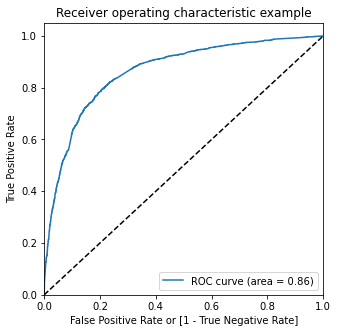

In [150]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

In [151]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.218665,0,0,1,1,1,0,0,0,0,0,0,0
1,0,0.321959,1,0,1,1,1,1,0,0,0,0,0,0
2,1,0.296462,2,0,1,1,1,0,0,0,0,0,0,0
3,0,0.925300,3,1,1,1,1,1,1,1,1,1,1,1
4,0,0.063204,4,0,1,0,0,0,0,0,0,0,0,0


In [152]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.382711  1.000000  0.000000
0.1   0.1  0.573728  0.966773  0.330046
0.2   0.2  0.721320  0.908095  0.605523
0.3   0.3  0.785173  0.823613  0.761341
0.4   0.4  0.797078  0.751856  0.825115
0.5   0.5  0.799107  0.673383  0.877055
0.6   0.6  0.778274  0.550725  0.919351
0.7   0.7  0.760823  0.464122  0.944773
0.8   0.8  0.732278  0.356310  0.965374
0.9   0.9  0.681683  0.188406  0.987508


- Sensitivity & Specificity & Accuracy curve

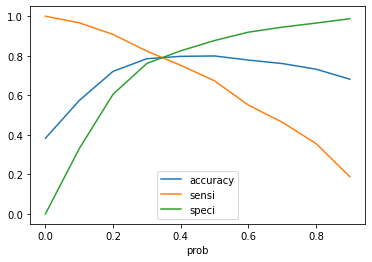

In [153]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [154]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.218665,0,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.321959,1,0,1,1,1,1,0,0,0,0,0,0,0
2,1,0.296462,2,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.925300,3,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.063204,4,0,1,0,0,0,0,0,0,0,0,0,0


# Accuracy

In [155]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7936958874458875

In [156]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3622,  941],
       [ 584, 2245]], dtype=int64)

In [157]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

# Sensitivity

In [158]:
TP / float(TP+FN)

0.7935666313184871

# Specificity

In [159]:
TN / float(TN+FP)

0.7937760245452553

# Precision

In [160]:
TP/(TP+FP)

0.7046453232893911

In [165]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_predicted)

0.7046453232893911

# Recall

In [161]:
TP / (TP + FN)

0.7935666313184871

In [166]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7935666313184871